### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('dataset/insurance.csv')

In [6]:
df.isnull().sum()

# There are no null values, The data is clean.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   premium   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Most of insurance takers are males in the data.<br>1064 people doesn't smoke. <br>There are 676 males in the total number of records. <br>364 people are from the southeast region.

In [9]:
df.describe()

,age,bmi,children,premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [10]:
#Numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [11]:
numerical_features

['age', 'bmi', 'children', 'premium']

In [12]:
#Categorical feature
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [13]:
categorical_features

['sex', 'smoker', 'region']

In [14]:
#Discrete Features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]

In [15]:
discrete_features

['children']

In [16]:
#Continuous features
cont_features = [feature for feature in numerical_features if feature not in discrete_features]

In [17]:
cont_features

['age', 'bmi', 'premium']

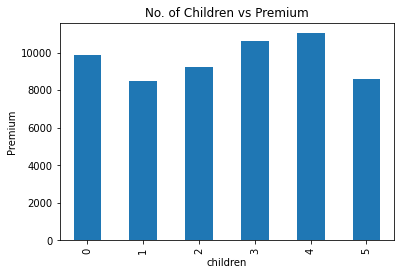

In [25]:
data = df.copy()
for feature in discrete_features:
	data.groupby(feature)['premium'].median().plot.bar()
	plt.ylabel('Premium')
	plt.title('No. of Children vs Premium')
	plt.show()

People with 3 or 4 children have the highest premiums.

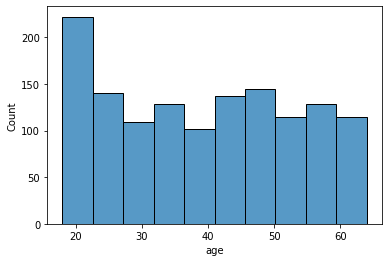

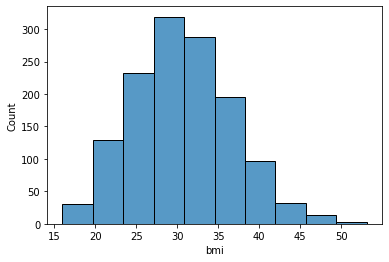

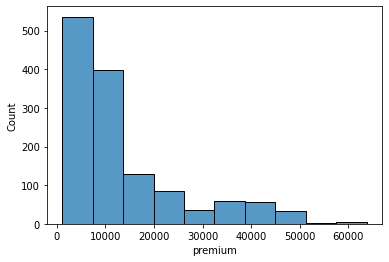

In [19]:
#Continuous features vs Count
data = df.copy()
for feature in cont_features:
    sns.histplot(data[feature], bins=10)
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()

Wrt Age: People aged at 20 +-5 have taken the highest number of insurance<br>
Wrt bmi: BMI range from 25-25 have taken the highest number of insurance<br>
Wrt Premium: More than 500 people have taken a insurance less than 10k

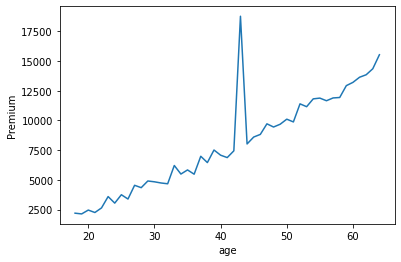

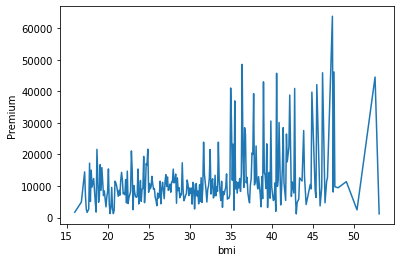

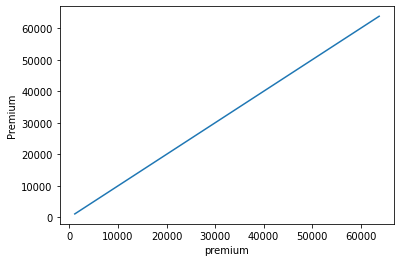

In [20]:
data = df.copy()
for feature in cont_features:
    data.groupby(feature)['premium'].median().plot()
    plt.ylabel('Premium')
    plt.xlabel(feature)
    plt.show()

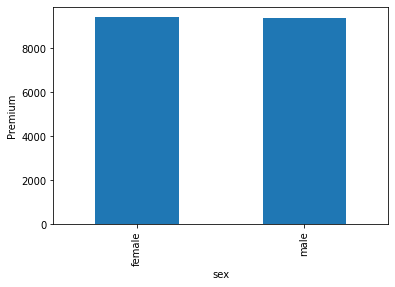

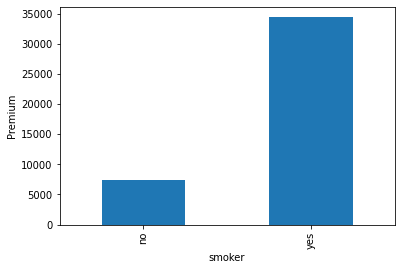

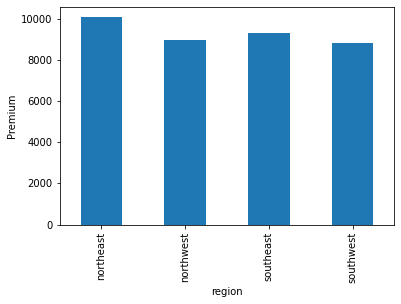

In [21]:
data = df.copy()
for feature in categorical_features:
    data.groupby(feature)['premium'].median().plot.bar()
    plt.ylabel('Premium')
    plt.xlabel(feature)
    plt.show()

Sex: The count of male and Female are almost similar in this dataset<br>

In [22]:
fd = df[categorical_features]

In [23]:
fd

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<AxesSubplot:>

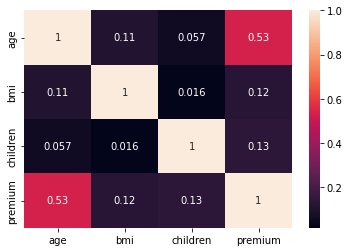

In [24]:
sns.heatmap(df.corr(method='spearman'), annot=True)

From the heat map we observe that our target variable(premium) is greatly affected by the age parameter and bmi affects our target variable the least.

<AxesSubplot:xlabel='premium', ylabel='age'>

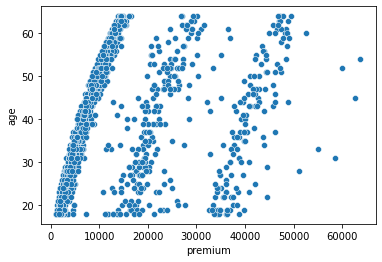

In [26]:
sns.scatterplot(x='premium',y='age',data=df)

We can observe from the above plot as well that the age parameter affects our target variable (premium).

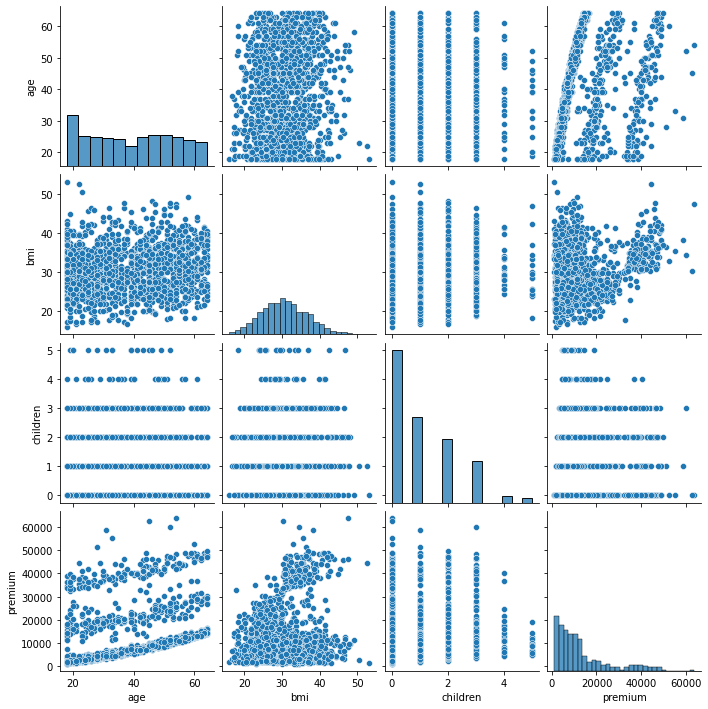

In [27]:
sns.pairplot(df)